In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import math

## Signal 생성

In [2]:
# sampling rate
fs = 10000000 # 10MHz

# signal length
t = np.arange(0, 0.035, 1 / fs) # s, sampling interval, time array

# generate signal
f1 = 60 # 60Hz
signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

# generate noise signal
np.random.seed(222)
n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
signal_n = 0.2*np.sin(2*np.pi*n1*t)

# total signal
normal_signal = signal_f + signal_n

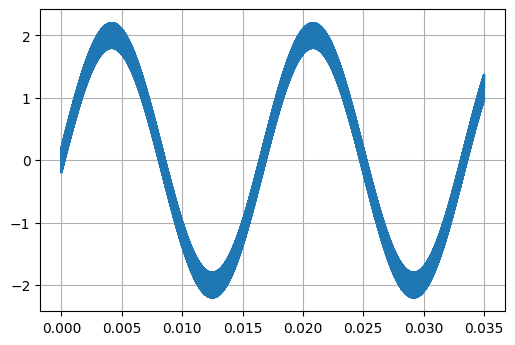

In [3]:
# visualizing signal

plt.figure(num = 1, dpi = 100)
plt.plot(t, normal_signal)
plt.grid()

## Arc 1 신호 생성

In [4]:
#  generate noise Arc 1 signal

n2 = 3000000 # 3MHz
np.random.seed(222)
random_mag_Arc1 = np.random.uniform(0.5, 0.8, 1500)
signal_Arc1 = random_mag_Arc1*np.sin(2*np.pi*n2*t[82500:84000]) # random magnitude 0.5 ~ 1

# total signal
ext_signal_Arc1 = normal_signal[82500:84000] + signal_Arc1


## Arc 2 신호 생성

In [5]:
#  generate noise Arc 2 signal

n3 = 4000000 # 4MHz

np.random.seed(333)
random_mag_Arc2 = np.random.uniform(0.8, 1.1, 1500)
signal_Arc2 = random_mag_Arc2*np.sin(2*np.pi*n3*t[82500:84000])

# total signal
ext_signal_Arc2 = normal_signal[82500:84000] + signal_Arc2

## II. Extracted signal

### i. normal signal

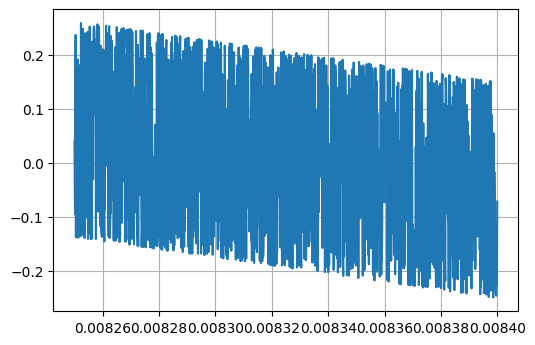

In [6]:
ext_t = t[82500:84000]
ext_signal = normal_signal[82500:84000]

plt.figure(num = 1, dpi = 100)
plt.plot(ext_t, ext_signal)
plt.grid()

### Fourier transformed Normal signal

<StemContainer object of 3 artists>

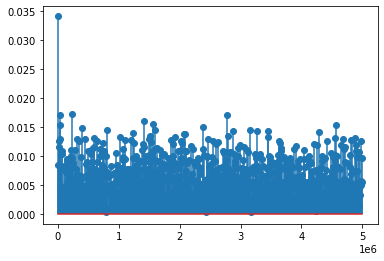

In [7]:
n = len(ext_signal)
f = np.linspace(0,fs/2, math.trunc(n/2))

Y = np.fft.fft(ext_signal) / n
Y = Y[range(math.trunc(n/2))]
amplitude_Hz = 2*abs(Y)

plt.stem(f, amplitude_Hz)

### Compute the Short Time Fourier Transform (STFT)

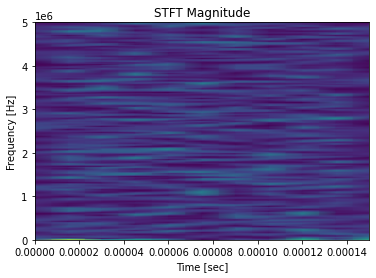

In [8]:
f, t, Zxx = signal.stft(ext_signal, fs = fs, nperseg = 300, nfft = 512)
plt.pcolormesh(t, f, np.abs(Zxx), shading = 'gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

### ii. Arc 1 signal

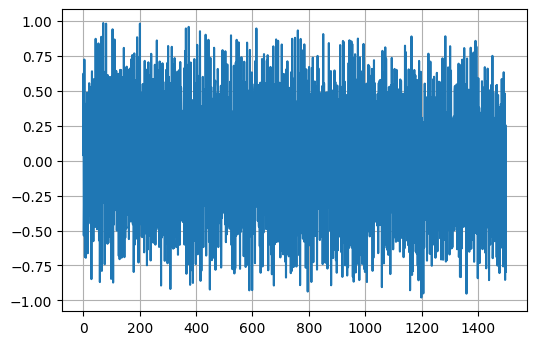

In [9]:
plt.figure(num = 1, dpi = 100)
plt.plot(ext_signal_Arc1)
plt.grid()

### Fourier transformed Arc 1 signal

<StemContainer object of 3 artists>

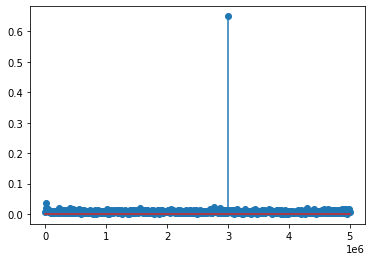

In [10]:
n = len(ext_signal_Arc1)
f = np.linspace(0, fs/2, math.trunc(n/2))

Y = np.fft.fft(ext_signal_Arc1) / n
Y = Y[range(math.trunc(n/2))]
amplitude_Hz = 2*abs(Y)

plt.stem(f, amplitude_Hz)

### Compute the Short Time Fourier Transform (STFT)

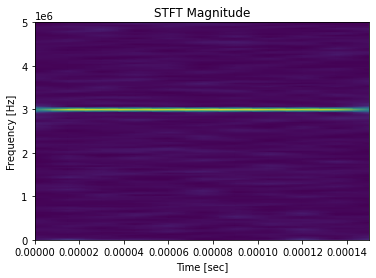

In [11]:
f_axis, t_axis, Zxx = signal.stft(ext_signal_Arc1, fs = fs, nperseg = 300)
plt.pcolormesh(t_axis, f_axis, np.abs(Zxx), shading = 'gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

### iii. Arc 2 signal

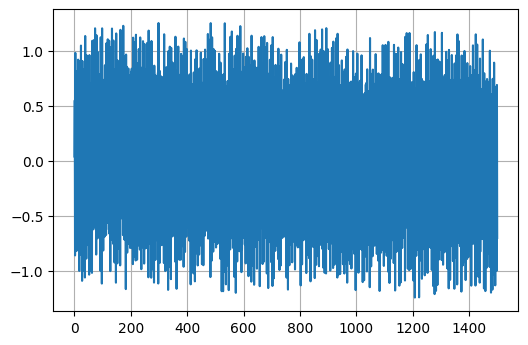

In [12]:
plt.figure(num = 1, dpi = 100)
plt.plot(ext_signal_Arc2)
plt.grid()

### Fourier transformed Arc 2 signal

<StemContainer object of 3 artists>

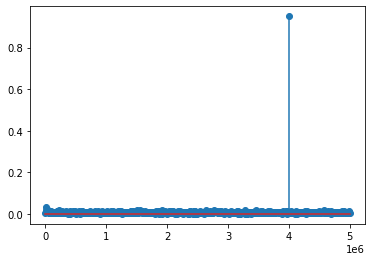

In [13]:
n = len(ext_signal_Arc2)
f = np.linspace(0, fs/2, math.trunc(n/2))

Y = np.fft.fft(ext_signal_Arc2) / n
Y = Y[range(math.trunc(n/2))]
amplitude_Hz = 2*abs(Y)

plt.stem(f, amplitude_Hz)

### Compute the Short Time Fourier Transform (STFT)

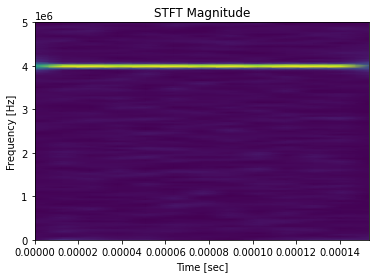

In [14]:
f_axis, t_axis, Zxx = signal.stft(ext_signal_Arc2, fs = fs)
plt.pcolormesh(t_axis, f_axis, np.abs(Zxx), shading = 'gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

### STFT DATA Features Function

In [15]:
def stft_signal(state_signal, fs):
    
    # Compute the Short Time Fourier Transform (STFT)
    f_axis, t_axis, Zxx = signal.stft(state_signal, fs = fs, nperseg = 300, nfft = 512)
    
    # 5 window division ...... f0 ~ f4로 나눠줌
    for i, j in enumerate(np.arange(0, len(t_axis)-2, 2)):
        globals()['f{0}'.format(i)] = abs(Zxx[:,j:3+j])
        
    # Max Magnitude of f0 ~ f4 ...... f0 ~ f4중에서 가장 큰 Magnitude값을 찾음.
    Max_mag = f0.max()
    
    for i in range(1, 5):
        a = globals()['f{0}'.format(i)]
        
        if Max_mag < a.max():
            Max_mag = a.max()
            
    # Max Hz of f0 ~ f4  ... f0~f4 중에서 가장 큰 Magnitude 값을 가진 주파수를 찾음.
    HZ = abs(Zxx)
    
    X, Y = np.where(HZ == Max_mag)
    Max_Hz_index = X[0]
    Max_Hz = f_axis[Max_Hz_index]
    
    # Min Magnitude of f0 ~ f4 ...... f0 ~ f4의 Max값들 중 가장 작은 Magnitude값을 찾음.
    Min_mag = f0.max()
    
    for i in range(1, 5):
        a = globals()['f{0}'.format(i)]
        # print(a.max())
        
        if Min_mag > a.max():
            Min_mag = a.max()
    
    # Min Hz of f0 ~ f4......f0~f4의 Max값들 중 가장 작은 Magnitude 값을 가진 주파수를 찾음.
    X, Y = np.where(HZ == Min_mag)
    Min_Hz_index = X[0]
    Min_Hz = f_axis[Min_Hz_index]
    
    # Max Hz - Min Hz = 변화율
    Hz_diff = Max_Hz - Min_Hz
    
    return (Max_mag, Min_mag, Max_Hz, Min_Hz, Hz_diff)

### i. normal state

In [16]:
normal_Max = []
normal_Mean = []
normal_Std = []
normal_Full_diff = []
normal_FFT_Hz_Max1 = []
normal_FFT_Mag_Max1 = []
normal_FFT_Hz_Max2 = []
normal_FFT_Mag_Max2 = []
normal_STFT_Hz_Max = []
normal_STFT_Hz_Min = []
normal_STFT_Mag_Max = []
normal_STFT_Mag_Min = []
normal_STFT_Hz_diff = []

def normal_signal(i):
    # sampling rate
    fs = 10000000 # 10MHz
    
    # signal length
    t = np.arange(0, 0.035, 1 / fs) # s, sampling interval, time array

    # generate signal
    f1 = 60 # 60Hz
    signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

    # generate noise signal
    np.random.seed(i)
    n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
    signal_n = 0.2*np.sin(2*np.pi*n1*t)

    # join signal
    n_signal = signal_f + signal_n
    
    # extract signal
    ext_signal = n_signal[82500:84000] # shoulder 부분 추출
    
    # Fourier transformed Normal signal
    n = 2048 # len(ext_signal) < 2^11 = 2048
    f = np.linspace(1000000, 1500000, math.trunc(n/2)) # 주파수 영역 값 범위 설정
    
    Y = np.fft.fft(ext_signal) / n # fft 변환 값 Y에 대입
    Y = Y[range(math.trunc(n/2))] # 대칭이므로 뒷부분 생략
    amplitude_Hz = 2*abs(Y) # 절대값 취한 후 2배해서 크기 나타냄
    
    # Short-time Fourier transformed Normal signal
    Max_mag, Min_mag, Max_Hz, Min_Hz, Hz_diff = stft_signal(ext_signal, 10000000)

    # collect data
    normal_Max.append(ext_signal.max()) # Max 값 feature 저장 
    normal_Mean.append(ext_signal.mean()) # Mean 값 feature 저장
    normal_Std.append(ext_signal.std()) # 표준편차 feature 저장
    normal_Full_diff.append(ext_signal.max() - ext_signal.min()) # Max 값 - Min 값 차이
    normal_FFT_Mag_Max1.append(amplitude_Hz.max()) # FFT 변환 후 가장 큰 Magnitude
    normal_FFT_Mag_Max2.append(sorted(amplitude_Hz, reverse = True)[1]) # 두 번쨰로 가장 큰 Magnitude
    normal_FFT_Hz_Max1.append(f[amplitude_Hz.argmax()]) # 가장 큰 주파수 값
    
    # 두 번째로 큰 주파수 값을 찾기 위한 임시 변수 생성 (test)
    test = np.where(amplitude_Hz == sorted(amplitude_Hz, reverse = True)[1])
    test = list(test)
    normal_FFT_Hz_Max2.append(f[test[0][0]]) # 두 번째로 큰 주파수 값
    
    # STFT 변환 함수 반환값들 저장
    normal_STFT_Mag_Max.append(Max_mag)
    normal_STFT_Mag_Min.append(Min_mag)
    normal_STFT_Hz_Max.append(Max_Hz)
    normal_STFT_Hz_Min.append(Min_Hz)
    normal_STFT_Hz_diff.append(Hz_diff)

In [17]:
# update seed

for i in range(0, 20):
    normal_signal(i)
    
# create DataFrame
normal_state = pd.DataFrame({"Max" : normal_Max,
                            "Mean" : normal_Mean,
                            "Std" : normal_Std,
                            "Full_diff": normal_Full_diff,
                            "FFT_Mag1" : normal_FFT_Mag_Max1,
                            "FFT_Hz1" : normal_FFT_Hz_Max1,
                            "FFT_Mag2" : normal_FFT_Mag_Max2,
                            "FFT_Hz2" : normal_FFT_Hz_Max2,
                            "STFT_Mag1" : normal_STFT_Mag_Max,
                            "STFT_Hz1" : normal_STFT_Hz_Max,
                            "STFT_Mag2" : normal_STFT_Mag_Min,
                            "STFT_Hz2" : normal_STFT_Hz_Min,
                            "STFT_diff" : normal_STFT_Hz_diff})

In [18]:
normal_state

,Max,Mean,Std,Full_diff,FFT_Mag1,FFT_Hz1,FFT_Mag2,FFT_Hz2,STFT_Mag1,STFT_Hz1,STFT_Mag2,STFT_Hz2,STFT_diff
0,0.259652,0.005268,0.144799,0.508298,0.024356,1.000489e+06,0.015152,1.000978e+06,0.048556,0.0,0.023619,761718.75,-761718.75
1,0.262632,0.003340,0.144802,0.511568,0.035353,1.000489e+06,0.012606,1.334800e+06,0.058553,0.0,0.029802,3515625.00,-3515625.00
2,0.257019,0.010629,0.148559,0.504668,0.026264,1.000489e+06,0.018762,1.000978e+06,0.069447,0.0,0.026188,2714843.75,-2714843.75
3,0.262077,0.003400,0.144927,0.508422,0.026863,1.000489e+06,0.015115,1.001466e+06,0.052904,0.0,0.024655,957031.25,-957031.25
4,0.260850,0.000353,0.145007,0.510835,0.024292,1.000489e+06,0.015182,1.001466e+06,0.055566,0.0,0.024883,0.00,0.00
5,0.262190,0.008453,0.141116,0.508319,0.018601,1.000489e+06,0.015568,1.412023e+06,0.035023,0.0,0.023246,2500000.00,-2500000.00
6,0.262553,0.010182,0.142349,0.510589,0.020646,1.000489e+06,0.014916,1.000000e+06,0.046898,0.0,0.023190,0.00,0.00
7,0.261760,0.006188,0.144682,0.510467,0.028274,1.000489e+06,0.014798,1.000978e+06,0.055833,0.0,0.026207,449218.75,-449218.75
8,0.260576,0.000541,0.141563,0.507587,0.021528,1.000489e+06,0.013527,1.279081e+06,0.052264,0.0,0.023885,0.00,0.00
9,0.261007,0.005081,0.145664,0.506678,0.027499,1.000489e+06,0.014268,1.231672e+06,0.055898,0.0,0.027149,4824218.75,-4824218.75


### ii. Arc 1 state

In [19]:
arc1_Max = []
arc1_Mean = []
arc1_Std = []
arc1_Full_diff = []
arc1_FFT_Hz_Max1 = []
arc1_FFT_Mag_Max1 = []
arc1_FFT_Hz_Max2 = []
arc1_FFT_Mag_Max2 = []
arc1_STFT_Hz_Max = []
arc1_STFT_Hz_Min = []
arc1_STFT_Mag_Max = []
arc1_STFT_Mag_Min = []
arc1_STFT_Hz_diff = []

def arc1_signal(i):
    # sampling rate
    fs = 10000000 # 10MHz
    
    # signal length
    t = np.arange(0, 0.035, 1 / fs) # s, sampling interval, time array

    # generate signal
    f1 = 60 # 60Hz
    signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

    # generate noise signal
    np.random.seed(i)
    n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
    signal_n = 0.2*np.sin(2*np.pi*n1*t)
    
    # generate noise Arc 1 signal
    n2 = 3000000 # 3MHz
    np.random.seed(i*10)
    random_mag_Arc1 = np.random.uniform(0.5, 0.8, 1500)
    signal_Arc1 = random_mag_Arc1*np.sin(2*np.pi*n2*t[82500:84000]) # random magnitude 0.5 ~ 1

    # add up signal
    n_signal = signal_f + signal_n
    signal_Arc1 = n_signal[82500:84000] + signal_Arc1
    
    # Fourier transformed Arc1 signal
    n = 2048 # len(signal_Arc1)
    f = np.linspace(1000000, 3000000, math.trunc(n/2))
    
    Y = np.fft.fft(signal_Arc1) / n
    Y = Y[range(math.trunc(n/2))]
    amplitude_Hz = 2*abs(Y)
    
    # Short-time Fourier transformed Arc1 signal
    Max_mag, Min_mag, Max_Hz, Min_Hz, Hz_diff = stft_signal(signal_Arc1, 10000000)
    
    # collect data
    arc1_Max.append(signal_Arc1.max())
    arc1_Mean.append(signal_Arc1.mean())
    arc1_Std.append(signal_Arc1.std())
    arc1_Full_diff.append(signal_Arc1.max() - signal_Arc1.min())
    arc1_FFT_Mag_Max1.append(amplitude_Hz.max())
    arc1_FFT_Mag_Max2.append(sorted(amplitude_Hz, reverse = True)[1])
    arc1_FFT_Hz_Max1.append(f[amplitude_Hz.argmax()])
    
    test = np.where(amplitude_Hz == sorted(amplitude_Hz, reverse = True)[1])
    test = list(test)
    arc1_FFT_Hz_Max2.append(f[test[0][0]])
    
    arc1_STFT_Mag_Max.append(Max_mag)
    arc1_STFT_Mag_Min.append(Min_mag)
    arc1_STFT_Hz_Max.append(Max_Hz)
    arc1_STFT_Hz_Min.append(Min_Hz)
    arc1_STFT_Hz_diff.append(Hz_diff)

In [20]:
# update seed

for i in range(100, 120):
    arc1_signal(i)
    
# create DataFrame
arc1_state = pd.DataFrame({"Max" : arc1_Max,
                            "Mean" : arc1_Mean,
                            "Std" : arc1_Std,
                           "Full_diff": arc1_Full_diff,
                            "FFT_Mag1" : arc1_FFT_Mag_Max1,
                            "FFT_Hz1" : arc1_FFT_Hz_Max1,
                            "FFT_Mag2" : arc1_FFT_Mag_Max2,
                            "FFT_Hz2" : arc1_FFT_Hz_Max2,
                          "STFT_Mag1" : arc1_STFT_Mag_Max,
                            "STFT_Hz1" : arc1_STFT_Hz_Max,
                            "STFT_Mag2" : arc1_STFT_Mag_Min,
                            "STFT_Hz2" : arc1_STFT_Hz_Min,
                            "STFT_diff" : arc1_STFT_Hz_diff})

In [21]:
arc1_state

,Max,Mean,Std,Full_diff,FFT_Mag1,FFT_Hz1,FFT_Mag2,FFT_Hz2,STFT_Mag1,STFT_Hz1,STFT_Mag2,STFT_Hz2,STFT_diff
0,1.016945,0.004122,0.483941,1.995903,0.474313,1.879765e+06,0.022879,1.001955e+06,0.317100,3007812.5,0.311374,3007812.5,0.0
1,0.991839,0.007655,0.489547,1.951851,0.478465,1.879765e+06,0.023656,1.001955e+06,0.330818,3007812.5,0.319049,3007812.5,0.0
2,0.988252,0.010684,0.482905,1.973374,0.473697,1.879765e+06,0.023862,1.001955e+06,0.327171,3007812.5,0.308510,3007812.5,0.0
3,1.011263,0.006567,0.490740,1.999841,0.480957,1.879765e+06,0.027995,1.001955e+06,0.327179,3007812.5,0.316119,3007812.5,0.0
4,0.976473,0.003634,0.476617,1.939450,0.466432,1.879765e+06,0.028484,1.001955e+06,0.315933,3007812.5,0.307477,3007812.5,0.0
5,0.994581,0.007733,0.484520,1.942901,0.475250,1.879765e+06,0.030298,1.001955e+06,0.323625,3007812.5,0.321563,3007812.5,0.0
6,0.988015,0.005322,0.480693,1.964819,0.470188,1.879765e+06,0.020750,1.001955e+06,0.318603,3007812.5,0.293976,3007812.5,0.0
7,0.970209,0.001964,0.483191,1.940905,0.473368,1.879765e+06,0.027013,1.001955e+06,0.326601,3007812.5,0.304716,3007812.5,0.0
8,0.984708,-0.001800,0.487661,1.988683,0.478150,1.879765e+06,0.022902,1.001955e+06,0.322821,3007812.5,0.313899,3007812.5,0.0
9,0.998145,0.012336,0.488535,1.952725,0.479185,1.879765e+06,0.029623,1.001955e+06,0.325531,3007812.5,0.312494,3007812.5,0.0


### iii. Arc2 state

In [22]:
arc2_Max = []
arc2_Mean = []
arc2_Std = []
arc2_Full_diff = []
arc2_FFT_Hz_Max1 = []
arc2_FFT_Mag_Max1 = []
arc2_FFT_Hz_Max2 = []
arc2_FFT_Mag_Max2 = []
arc2_STFT_Hz_Max = []
arc2_STFT_Hz_Min = []
arc2_STFT_Mag_Max = []
arc2_STFT_Mag_Min = []
arc2_STFT_Hz_diff = []


def arc2_signal(i):
    # sampling rate
    fs = 10000000 # 10MHz
    
    # signal length
    t = np.arange(0, 0.035, 1 / fs) # s, sampling interval, time array

    # generate signal
    f1 = 60 # 60Hz
    signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

    # generate noise signal
    np.random.seed(i)
    n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
    signal_n = 0.2*np.sin(2*np.pi*n1*t)
    
    # generate noise Arc 2 signal
    n2 = 4000000 # 4MHz
    np.random.seed(i*20)
    random_mag_Arc2 = np.random.uniform(0.8, 1.1, 1500)
    signal_Arc2 = random_mag_Arc2*np.sin(2*np.pi*n2*t[82500:84000])

    # add up signal
    n_signal = signal_f + signal_n
    signal_Arc2 = n_signal[82500:84000] + signal_Arc2
    
    # Fourier transformed Arc2 signal
    n = 2048 # len(signal_Arc2)
    f = np.linspace(1000000, 5000000, math.trunc(n/2))
    
    Y = np.fft.fft(signal_Arc2) / n
    Y = Y[range(math.trunc(n/2))]
    amplitude_Hz = 2*abs(Y)
    
    # Short-time Fourier transformed Arc1 signal
    Max_mag, Min_mag, Max_Hz, Min_Hz, Hz_diff = stft_signal(signal_Arc2, 10000000)
    
    # collect data
    arc2_Max.append(signal_Arc2.max())
    arc2_Mean.append(signal_Arc2.mean())
    arc2_Std.append(signal_Arc2.std())
    arc2_Full_diff.append(signal_Arc2.max() - signal_Arc2.min())
    arc2_FFT_Mag_Max1.append(amplitude_Hz.max())
    arc2_FFT_Mag_Max2.append(sorted(amplitude_Hz, reverse = True)[1])
    arc2_FFT_Hz_Max1.append(f[amplitude_Hz.argmax()])
    
    test = np.where(amplitude_Hz == sorted(amplitude_Hz, reverse = True)[1])
    test = list(test)
    arc2_FFT_Hz_Max2.append(f[test[0][0]])
    
    arc2_STFT_Mag_Max.append(Max_mag)
    arc2_STFT_Mag_Min.append(Min_mag)
    arc2_STFT_Hz_Max.append(Max_Hz)
    arc2_STFT_Hz_Min.append(Min_Hz)
    arc2_STFT_Hz_diff.append(Hz_diff)

In [23]:
# update seed

for i in range(100, 120):
    arc2_signal(i)
    
# create DataFrame
arc2_state = pd.DataFrame({"Max" : arc2_Max,
                            "Mean" : arc2_Mean,
                            "Std" : arc2_Std,
                           "Full_diff": arc1_Full_diff,
                            "FFT_Mag1" : arc2_FFT_Mag_Max1,
                            "FFT_Hz1" : arc2_FFT_Hz_Max1,
                            "FFT_Mag2" : arc2_FFT_Mag_Max2,
                            "FFT_Hz2" : arc2_FFT_Hz_Max2,
                          "STFT_Mag1" : arc2_STFT_Mag_Max,
                            "STFT_Hz1" : arc2_STFT_Hz_Max,
                            "STFT_Mag2" : arc2_STFT_Mag_Min,
                            "STFT_Hz2" : arc2_STFT_Hz_Min,
                            "STFT_diff" : arc2_STFT_Hz_diff})

In [24]:
arc2_state

,Max,Mean,Std,Full_diff,FFT_Mag1,FFT_Hz1,FFT_Mag2,FFT_Hz2,STFT_Mag1,STFT_Hz1,STFT_Mag2,STFT_Hz2,STFT_diff
0,1.277591,0.001539,0.689353,1.995903,0.695348,3.346041e+06,0.695348,3.346041e+06,0.485570,4003906.25,0.467699,4003906.25,0.0
1,1.263439,0.004896,0.690030,1.951851,0.695437,3.346041e+06,0.695437,3.346041e+06,0.483087,4003906.25,0.472132,4003906.25,0.0
2,1.288785,0.005867,0.690514,1.973374,0.697151,3.346041e+06,0.697151,3.346041e+06,0.480549,4003906.25,0.475631,4003906.25,0.0
3,1.289243,0.008866,0.692452,1.999841,0.698117,3.346041e+06,0.698117,3.346041e+06,0.485740,4003906.25,0.472995,4003906.25,0.0
4,1.298359,0.006538,0.681221,1.939450,0.686916,3.346041e+06,0.686916,3.346041e+06,0.476352,4003906.25,0.463547,4003906.25,0.0
5,1.292276,0.010361,0.687878,1.942901,0.693253,3.346041e+06,0.693253,3.346041e+06,0.479244,4003906.25,0.463372,4003906.25,0.0
6,1.287772,0.006434,0.692255,1.964819,0.698265,3.346041e+06,0.698265,3.346041e+06,0.485753,4003906.25,0.467963,4003906.25,0.0
7,1.241055,0.001438,0.683310,1.940905,0.689397,3.346041e+06,0.689397,3.346041e+06,0.473944,4003906.25,0.469808,4003906.25,0.0
8,1.278141,-0.000254,0.683055,1.988683,0.688854,3.346041e+06,0.688854,3.346041e+06,0.473424,4003906.25,0.464221,4003906.25,0.0
9,1.305992,0.010176,0.691256,1.952725,0.696904,3.346041e+06,0.696904,3.346041e+06,0.480567,4003906.25,0.473534,4003906.25,0.0


### iv. Data merge

In [25]:
Arc_Fault = pd.concat([normal_state, arc1_state, arc2_state], ignore_index = True)

In [26]:
Arc_Fault.insert(12, "label", 1, True)
Arc_Fault.label.iloc[0:20] = 0

c:\users\user\anaconda3\envs\etri\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [27]:
Arc_Fault

,Max,Mean,Std,Full_diff,FFT_Mag1,FFT_Hz1,FFT_Mag2,FFT_Hz2,STFT_Mag1,STFT_Hz1,STFT_Mag2,STFT_Hz2,label,STFT_diff
0,0.259652,0.005268,0.144799,0.508298,0.024356,1.000489e+06,0.015152,1.000978e+06,0.048556,0.00,0.023619,761718.75,0,-761718.75
1,0.262632,0.003340,0.144802,0.511568,0.035353,1.000489e+06,0.012606,1.334800e+06,0.058553,0.00,0.029802,3515625.00,0,-3515625.00
2,0.257019,0.010629,0.148559,0.504668,0.026264,1.000489e+06,0.018762,1.000978e+06,0.069447,0.00,0.026188,2714843.75,0,-2714843.75
3,0.262077,0.003400,0.144927,0.508422,0.026863,1.000489e+06,0.015115,1.001466e+06,0.052904,0.00,0.024655,957031.25,0,-957031.25
4,0.260850,0.000353,0.145007,0.510835,0.024292,1.000489e+06,0.015182,1.001466e+06,0.055566,0.00,0.024883,0.00,0,0.00
5,0.262190,0.008453,0.141116,0.508319,0.018601,1.000489e+06,0.015568,1.412023e+06,0.035023,0.00,0.023246,2500000.00,0,-2500000.00
6,0.262553,0.010182,0.142349,0.510589,0.020646,1.000489e+06,0.014916,1.000000e+06,0.046898,0.00,0.023190,0.00,0,0.00
7,0.261760,0.006188,0.144682,0.510467,0.028274,1.000489e+06,0.014798,1.000978e+06,0.055833,0.00,0.026207,449218.75,0,-449218.75
8,0.260576,0.000541,0.141563,0.507587,0.021528,1.000489e+06,0.013527,1.279081e+06,0.052264,0.00,0.023885,0.00,0,0.00
9,0.261007,0.005081,0.145664,0.506678,0.027499,1.000489e+06,0.014268,1.231672e+06,0.055898,0.00,0.027149,4824218.75,0,-4824218.75


In [28]:
# 데이터 파일 csv 형식으로 저장.
# Arc_Fault.to_csv('Arc_Data.csv', index = False)